In [146]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from collections import Counter

In [18]:
!pip install sklearn
!pip install seaborn

You should consider upgrading via the '/Users/hannahkaplan/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/hannahkaplan/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
#user_id = 'hannah kaplan'
#playlist_url ="https://api.spotify.com/v1/users/{user_id}/playlists"
#client_id = '7a4ecd293d0f4747ba2e9985f468a352'
#client_secret = '5d504396b5224aec8fa63c14db7b2076'
#auth_url = 'https://accounts.spotify.com/api/token'

In [43]:
#~600k Tracks updated April 2021
df = pd.read_csv('tracks.csv')

In [44]:
type(df)

pandas.core.frame.DataFrame

In [45]:
#lets see what this data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [46]:
#lets look in an organized way
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [47]:
#how many songs are we looking at.
#in csv file there are 586,672 songs - i am going to make it so there are only 30,000 rows.

df.shape

(586672, 20)

In [48]:
#categories for songs.
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [49]:
#what is the most popular song? 
df.sort_values('popularity',ascending=False).head(20)
#Looks like its Peaches by Justin Bieber. 
#notes of valence - scale is 0-1, with one being happiest. 

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


In [54]:
df.sort_values('valence', ascending=False).head(20)

,id,name,popularity,artists,id_artists,release_date,danceability,energy,speechiness,instrumentalness,valence
397802,7e3bLyrHNCBH3HnHDpca5a,La carezza della mamma,35,['Matteo Bosi'],['0TrrnSs0g46uyEEnvqLv23'],2011-07-01,0.713,0.516,0.0639,0.946000,1.000
322093,0Tz023PcPX4JsVFtOCU5o4,Lausavisur,11,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.940,0.328,0.1920,0.993000,1.000
322002,3hd9GXM0Ahb3wsyETmATPZ,Loan Er Komin,18,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.838,0.442,0.3050,0.050900,1.000
288680,4czwRicqbT6JES6kIg7KUE,Ο ύμνος του ΠΑΝΑΘΗΝΑΪΚΟΥ,7,['Λάκης Γαβαλάς'],['6Ga2m0HBbLE05XTUEpAVVt'],1978,0.956,0.519,0.0588,0.000036,1.000
236547,3rHsX3TLPYixr7eGzRlZqI,Pasito Duranguense,51,['Montez de Durango'],['1i4xi4ramy5BPYr2Bhf6sc'],2002-01-04,0.912,0.824,0.0831,0.541000,1.000
322056,5B9796p9CkG9BMDhgFZ3Rk,Alfareidin ( Stod Eg Ut I ),13,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.774,0.454,0.1120,0.957000,1.000
11955,53nhbx7yp4TJEpmMBCLWPQ,Chatter,0,['Raymond Scott'],['31DffUzogcRBJT3Andaqtt'],1937,0.768,0.317,0.8640,0.224000,1.000
206971,6NcXXqOUOTrqoJvzzFNNB3,Noches Vacias,33,['Karolina'],['5UCcU04GZsZJY2g2qmisNp'],1992,0.753,0.524,0.0531,0.475000,1.000
322066,6SHlkNPxTA1ZlVVuAW74dY,Voluvisa,13,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.849,0.421,0.1240,0.847000,1.000
322102,47XYOIV7xMlGQ7sfkfw1X8,Glettinn Maninn,11,['Halldor Waren'],['2Ye1dPoVQvszrnFzO7Ffbc'],2008-12-01,0.860,0.406,0.1330,0.241000,1.000


In [188]:
df.tail()

,id,name,popularity,artists,id_artists,release_date,danceability,energy,speechiness,instrumentalness,valence
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0.0292,0.000000,0.2110
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0.0652,0.000297,0.6860
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,0.0408,0.000150,0.0663
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,0.0345,0.000003,0.4380
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,0.0363,0.000000,0.9750


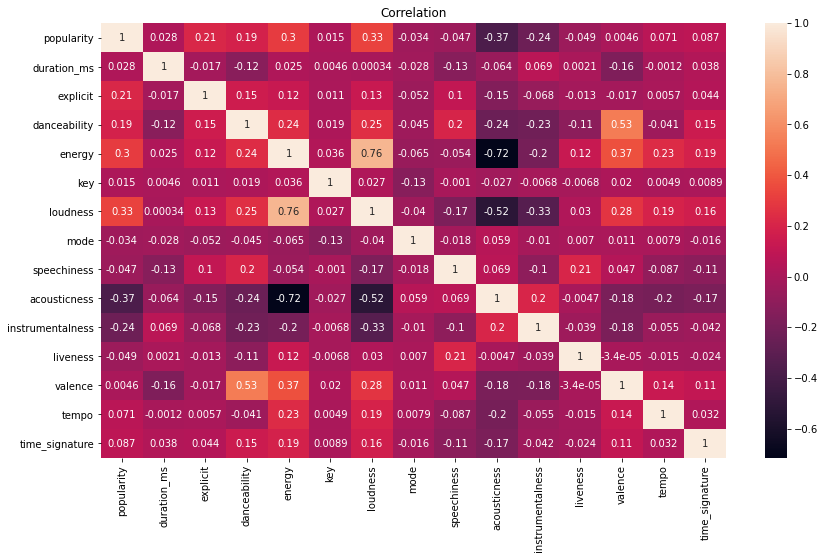

In [50]:
#ive never used a heatmap in Pandas so testing it out here with song categories!
corr = df.corr(method='pearson')
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot= True)
plt.title('Correlation')
plt.show()

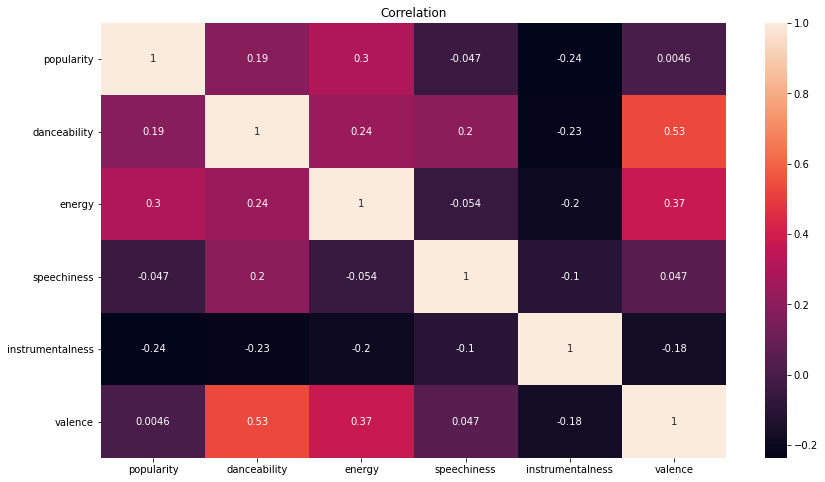

In [51]:
df.drop(['acousticness','loudness','tempo','explicit','liveness','key','time_signature','mode','duration_ms'], axis = 1, inplace=True )

# we see correlations once more, however I dropped a few.. 
corr = df.corr(method='pearson')
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot= True)
plt.title('Correlation')
plt.show()
#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. 
#In our case, the white/lighter colors shows very strong correlations.
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

In [ ]:
#higest correlation is Valence and Danceability (which makes sense - happiness would likely == dancing) at 0.53
#2nd highest correlation at 0.37 - energy and valence. So, happier ranked songs have more energy.

In [60]:
#lets look at the most recent year. 2021.
df.release_date

0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [66]:
df_2021 = df[df['release_date'].str.contains("2021")]

In [67]:
df_2021

,id,name,popularity,artists,id_artists,release_date,danceability,energy,speechiness,instrumentalness,valence
39907,3nyP7Dgjiy1cay2HRD98I7,09 01 1966,3,['Primiano Red'],['1SUAfonteIa6qVc7nFFTNF'],2021-01-28,0.507,0.341,0.0302,0.000245,0.3190
73441,0mrBr6it6Zcbn3fzXfZWC3,Year 3000,26,['JayTheKing'],['3V2h6jRks9dVEYhDMr1nsx'],2021-02-04,0.606,0.538,0.1010,0.000384,0.1850
73449,558D3GX2TjNixp21ZCjTvN,THE YEAR 3000,0,"['The Fifth Reality', 'Benjamin']","['5aIaavp1IwFZ3Dnehch0QD', '0GAehTZ3TTgHlTRcHJ...",2021-04-10,0.616,0.842,0.1030,0.412000,0.7820
73453,1I8I42gmNic7Jag290dVTM,Logical Brain - Year 3000 Mix,0,['Electro Mann'],['715ETHjAlf1sXM4vFEmxjT'],2021-04-09,0.745,0.732,0.0759,0.928000,0.9540
73519,5qzcKzMSBsHLrq3ldccNOd,Year 3000,0,['Ellis Dews'],['1xPnS1N7yqsIw0vPTuwi6c'],2021-02-24,0.712,0.940,0.0593,0.738000,0.7370
...,...,...,...,...,...,...,...,...,...,...,...
585284,5Pww1E3L6p0DnY9w8JnpE6,EXTENDO,57,['Dizzy'],['7lKk7yXNockkDjhb1GCeOy'],2021-01-22,0.814,0.592,0.2500,0.000002,0.4420
585285,6g0RVZLxxL62W4YVMWW03a,Marek Hamšík,44,"['Rasmus Gozzi', 'Viktor Klemming']","['3loTvAld5Tpk5aSNbboGpj', '2Ca240EAm8R903UkkL...",2021-04-08,0.746,0.933,0.4670,0.000000,0.4420
585286,5n2dOPDtXgvZGJO0RqQj2P,Rich,57,['Julia Alfrida'],['4GcW03232y77FiMhneVmKd'],2021-02-13,0.596,0.719,0.2200,0.000000,0.3580
586297,0GWNh7kAj4Lq14UBxCPK5h,At Sunset,1,['Oriental Music Zone'],['7IgLHADCmO8pOUAqR9kTo3'],2021-01-16,0.192,0.145,0.0421,0.929000,0.0395


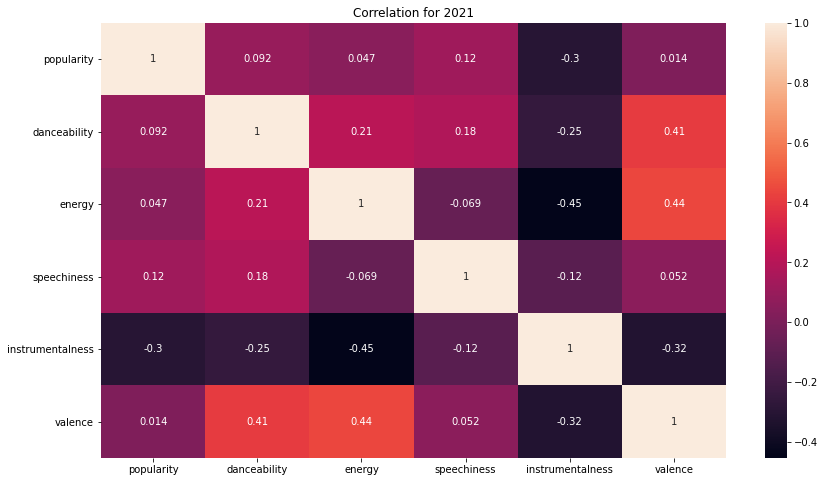

In [71]:
#just to quickly see overall correlations for 2021. 

corr = df_2021.corr(method='pearson')
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot= True)
plt.title('Correlation for 2021')
plt.show()

In [75]:
df_2021.sort_values("popularity", ascending=False).head(50)

,id,name,popularity,artists,id_artists,release_date,danceability,energy,speechiness,instrumentalness,valence
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0.1190,0.000000,0.4640
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,0.0601,0.000013,0.1320
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,0.0913,0.000000,0.4720
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,0.0324,0.000000,0.7190
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,0.0600,0.000000,0.5050
93807,4cG7HUWYHBV6R6tHn1gxrl,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...","['7i9j813KFoSBMldGqlh2Z1', '1gALaWbNDnwS2ECV09...",2021-01-15,0.824,0.862,0.1260,0.000132,0.8010
93808,5YYW3yRktprLRr47WK219Y,Ella No Es Tuya - Remix,92,"['Rochy RD', 'Myke Towers', 'Nicki Nicole']","['4riOEaOW5hCeqomFDBk0aP', '7iK8PXO48WeuP03g8Y...",2021-02-03,0.585,0.611,0.2880,0.000000,0.9620
93811,4u4NyuceXP7Uzh7XFJKCr1,Hold On,92,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],2021-03-05,0.658,0.634,0.0413,0.000000,0.2900
93812,3iw6V4LH7yPj1ESORX9RIN,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,92,"['Nathan Evans', '220 KID', 'Billen Ted']","['1PKErrAhYFdfrDymGHRQRo', '4Euia7UzdRshy1DJOS...",2021-01-21,0.722,0.893,0.0475,0.000937,0.4390
93809,1XXimziG1uhM0eDNCZCrUl,Up,92,['Cardi B'],['4kYSro6naA4h99UJvo89HB'],2021-02-05,0.868,0.795,0.2690,0.019300,0.8190


In [ ]:
#df_2021.groupby('popularity')['valence'].value_counts().groupby('popularity',group_keys=False).head(50).plot(kind='barh')

In [87]:
df_2021.groupby("artists").popularity.value_counts()

artists                             popularity
["Chef'Special"]                    62            1
["Edgar 'Jones' Jones"]             0             2
["L'Allemand", 'Hornet La Frappe']  60            1
["Mahlano Da'don"]                  43            1
["Pete O'Deep"]                     4             2
Name: popularity, dtype: int64

In [126]:
#loking for artists ranked by popularity.
df_2021.sort_values('popularity',ascending=False)[['artists','name','popularity','valence']].head(30).reset_index()

,index,artists,name,popularity,valence
0,93802,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",Peaches (feat. Daniel Caesar & Giveon),100,0.4640
1,93803,['Olivia Rodrigo'],drivers license,99,0.1320
2,93804,['Masked Wolf'],Astronaut In The Ocean,98,0.4720
3,93805,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",Leave The Door Open,96,0.7190
4,93806,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",Fiel,94,0.5050
5,93807,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,0.8010
6,93808,"['Rochy RD', 'Myke Towers', 'Nicki Nicole']",Ella No Es Tuya - Remix,92,0.9620
7,93811,['Justin Bieber'],Hold On,92,0.2900
8,93812,"['Nathan Evans', '220 KID', 'Billen Ted']",Wellerman - Sea Shanty / 220 KID x Billen Ted ...,92,0.4390
9,93809,['Cardi B'],Up,92,0.8190


In [153]:
df_2021.sort_values("valence",ascending=False)[['artists','name','valence','popularity']].head(10).reset_index()

,index,artists,name,valence,popularity
0,245624,['Tom Vigebo'],Lonely Giant,0.978,0
1,562916,['ハヤシユウ'],Lucky Year - 2021 Ver.,0.977,3
2,74978,['Yu Hayashi'],Lucky Year - 2021 Ver.,0.977,0
3,201126,['Raul Montes'],El Amor Que No Te Di,0.976,48
4,201194,['manuellhp'],only,0.976,41
5,201118,['Loco para'],Aser un Dos para Dormir,0.973,54
6,265302,['Kangimilian'],Piecka Dzvenk,0.972,43
7,265351,['Ivo Jebly'],Lemonade,0.972,37
8,112108,['The Beatles'],I Saw Her Standing There - Remastered 2009,0.971,22
9,94097,['Daviles de Novelda'],Flamenco y Bachata,0.970,78


In [158]:
year_avg= df_2021.mean()
year_avg.head(6)

popularity          35.191848
danceability         0.671531
energy               0.617998
speechiness          0.130416
instrumentalness     0.119411
valence              0.506228
dtype: float64

In [162]:
#what artist has produed the most songs this year so far. 
df_2021.artists.value_counts().head(30).to_frame()

,artists
['J Balvin'],284
['Justin Bieber'],189
['Daddy Yankee'],156
['Demi Lovato'],90
['Imagine Dragons'],64
['KAROL G'],62
['White Noise Baby Sleep Music'],49
['Seventeen Years Old And Berlin Wall'],48
['Lil Tjay'],48
['Maroon 5'],48


In [178]:
#exporting narrowed down data sets to csv files
df_pop = df_2021.sort_values('popularity',ascending=False).head(50)
df_pop.to_csv('popularity2021.csv')

df_val = df_2021.sort_values('valence',ascending=False)
df_val.to_csv('val2021.csv')